<style>
    /* Set the line height to 1.5 */
    p {
        line-height: 1.75;
        font-size: 1rem;
    
    }
</style>

# <center> predicting endangered animals levels </center>
 #### <center> in this project we will try to predict what is the extinction danger level of animals using a data set from the website : A-Z animals <center/>


## Step 1: crawling

<font size="2.5">We started the project by crawling from "A-Z animals" website in [this link](https://a-z-animals.com/animals/endangered/):</font>

<p>The site is a list of animals divided to danger levels with information on each animal. <br> Using BeutifulSoup we iterated through all the danger level links and created a dataset with all the relevant information. <br> Each animal was defined as one of the following danger leves:
</p>

 *  extinct
 *  extinct in the wild 
 *  critically endangered
 *  endangered
 *  vulnerable
 * near threatened
 * least concern
 * data deficient and not evaluated



In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time

headers = {
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'en-US,en;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
}
url = "https://a-z-animals.com/animals/endangered/"
response1 = requests.get(url, headers=headers,allow_redirects=False)
soup1 = BeautifulSoup(response1.content,"html.parser")
figure = soup1.find('figure')
links = figure.findAll('a')
links2 = []

for a in links:
    links2.append(a["href"])


links_final= [*set(links2)]

# creats the lists for the df columns


df = pd.DataFrame()
i = 0
j=0

#loop to find all the category links
for link in links_final:
    response_temp = requests.get(link, headers=headers,allow_redirects=False)
    soup_temp = BeautifulSoup(response_temp.content,"html.parser")
    animals= soup_temp.findAll('a', attrs= {"class": "trackLink"})
    
    names = []
    trackLinks = []
    lifeSpans = []
    weights = []
    heights = []
    lengths = []
    populations = []
    habitats = []
    diets = []
    litters = []
    gestations = []
    biggestThreats = []
    numberOfSpeciesList = []
    predators = []
    dangerlevels = []
    phylums = []
    classes = []
    preys = []
    skinTypes = []
    orders = []
    locations = []
    families = []
    genuses = []
    j=j+1
    
    #loop to add all the category links to a list
    for a in animals:
        trackLinks.append(a["href"])
    #loop to go through all the animals and collect data for the df lists  
    trackLinks= [*set(trackLinks)]
    time.sleep(20)
    for href in trackLinks:
        
        while True:
         
            try:
                response_temp = requests.get(href, headers=headers,allow_redirects=False)
                soup_temp = BeautifulSoup(response_temp.content,"html.parser")
                try:
                    name = soup_temp.find("h1", {"class": "has-text-align-center has-custom-size text-white"}).getText().strip()
                except:
                    name = np.nan

                try:
                    lifespan = soup_temp.find(text="Lifespan").findNext('dd').contents[0].getText()
                except Exception as e:
                    lifespan = np.nan
                try:
                    weight = soup_temp.find(text="Weight").findNext('dd').contents[0].getText()

                except Exception as e:
                    weight = np.nan
                try:
                    height = soup_temp.find(text="Height").findNext('dd').contents[0].getText()
                except Exception as e:
                    height = np.nan
                try:
                    length = soup_temp.find(text="Length").findNext('dd').contents[0].getText()
                except Exception as e:
                    length = np.nan
                try:
                    population = soup_temp.find(text="Estimated Population Size").findNext('dd').contents[0].getText()
                except Exception as e:
                    population = np.nan
                try:
                    habitat = soup_temp.find(text="Habitat").findNext('dd').contents[0].getText()
                except Exception as e:
                    habitat = np.nan
                try:
                    diet = soup_temp.find(text="Diet").findNext('dd').contents[0].getText()
                except Exception as e:
                    diet = np.nan
                try:
                    litter = soup_temp.find(text="Litter Size").findNext('dd').contents[0].getText()
                except Exception as e:
                    litter = np.nan
                try:
                    gestation = soup_temp.find(text="Gestation Period").findNext('dd').contents[0].getText()
                except Exception as e:
                    gestation = np.nan
                try:
                    biggestThreat = soup_temp.find(text="Biggest Threat").findNext('dd').contents[0].getText()
                except Exception as e:
                    biggestThreat = np.nan
                try:
                    numberOfSpecies = soup_temp.find(text="Number Of Species").findNext('dd').contents[0].getText()
                except Exception as e:
                    numberOfSpecies = np.nan
                try:
                    predator = soup_temp.find(text="Predators").findNext('dd').contents[0].getText()
                except Exception as e:
                    predator = np.nan
                try:
                    phylum = soup_temp.find(text="Phylum").findNext('dd').contents[0].getText()
                except Exception as e:
                    phylum = np.nan
                try:
                    classOfAnimal = soup_temp.find(text="Class").findNext('dd').contents[0].getText()
                except Exception as e:
                    classOfAnimal = np.nan
                try:
                    prey = soup_temp.find(text="Prey").findNext('dd').contents[0].getText()
                except Exception as e:
                    prey = np.nan
                try:
                    skinType = soup_temp.find(text="Skin Type").findNext('dd').contents[0].getText()
                except Exception as e:
                    skinType = np.nan
                try:
                    order = soup_temp.find(text="Order").findNext('dd').contents[0].getText()
                except Exception as e:
                    order = np.nan
                try:
                    location = []
                    h2_tag = soup_temp.select_one('h2:contains("Locations")')
                    ul_tag = h2_tag.find_next_sibling('ul')
                    li_tags = ul_tag.find_all('li')
                    for li in li_tags:
                        location.append(li.text)
                except Exception as e:
                    location = np.nan
                try:
                    family = soup_temp.find(text="Family").findNext('dd').contents[0].getText()
                except Exception as e:
                    family = np.nan
                try:
                    genus = soup_temp.find(text="Genus").findNext('dd').contents[0].getText()
                except Exception as e:
                    genus = np.nan
                dangerlevel = j
                    
                    
                
                

                #adding the data of the animals to the lists (columns)    
                names.append(name)   
                lifeSpans.append(lifespan)
                weights.append(weight)
                heights.append(height)
                lengths.append(length)
                populations.append(population)
                habitats.append(habitat)
                diets.append(diet)
                litters.append(litter)
                gestations.append(gestation)
                biggestThreats.append(biggestThreat)
                numberOfSpeciesList.append(numberOfSpecies)
                predators.append(predator)
                dangerlevels.append(dangerlevel)
                phylums.append(phylum)
                classes.append(classOfAnimal)
                preys.append(prey)
                skinTypes.append(skinType)
                orders.append(order)
                locations.append(location)
                families.append(family)
                genuses.append(genus)
                



                #increament i and sleep 
                i = i +1
                if (i % 14 == 0):
                    time.sleep(20)
                if (i % 100 == 0):
                    time.sleep(30)
                    print (i)
                
            except Exception as e:
                print(e)
                time.sleep(30)
                continue
            break
    
    # Creating the DataFrame
    df2 = pd.DataFrame({"Name":names,"phylum":phylums, "class":classes, "order":orders, "family": families,"genus":genuses,"locations":locations, "lifespan":lifeSpans,"weight":weights,"height":heights,"length":lengths,"population":populations,"habitats":habitat,"diet":diets,"litter_size":litters, "gestation_period":gestations, "Biggest_Threat": biggestThreats, "number_of_species": numberOfSpeciesList, "predators":predators, "prey":preys, "skin_type": skinTypes, "danger_level": dangerlevels})
    frame=[df, df2]
    df = pd.concat(frame)
    print(df)
    
    names = []
    lifeSpans = []
    weights = []
    heights = []
    lengths = []
    populations = []
    habitats = []
    diets = []
    litters = []
    gestations = []
    biggestThreats = []
    numberOfSpeciesList = []
    predators = []
    dangerlevels = []
    phylums = []
    classes = []
    preys = []
    skinTypes = []
    orders = []
    locations = []
    families= []
    genuses = []






df.to_csv('animal.csv') 
df

## Step 2: Data Processing

<p> Our next step was to clean the data and get it organized.<br>
 At first, we coverted 7 categorical columns to numerical values ( while leaving the missing values 'np.nan' and not as a category ) <br> Then we fiiled the missing values in the coloums: 'Phylum' , 'Skin Type' and 'Diet' with the mode of each coloumn.</p>
<br><br>
<p>

In [44]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib as mpl
import requests
import time
import re

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


#df.to_csv('anemal.csv') 
df = pd.read_csv('anemal.csv')
df2=df.copy()

#Fill missing values
df.fillna("missing", inplace=True)

#convert fron object type to numeric
label = preprocessing.LabelEncoder()
label2 = preprocessing.LabelEncoder()
label3 = preprocessing.LabelEncoder() 
label4 = preprocessing.LabelEncoder() 
label5 = preprocessing.LabelEncoder() 
label6 = preprocessing.LabelEncoder() 
label7 = preprocessing.LabelEncoder() 
label8 = preprocessing.LabelEncoder() 


df["phylum"] = label.fit_transform(df["phylum"])
df["class"] = label2.fit_transform(df["class"])
df["order"] = label3.fit_transform(df["order"])
df["family"] = label4.fit_transform(df["family"])
df["genus"] = label5.fit_transform(df["genus"])
df["diet"] = label6.fit_transform(df["diet"])
df["skin_type"] = label7.fit_transform(df["skin_type"])

# finding the new value of 'missing' 
missing_index_phylum = label.classes_.tolist().index("missing")
missing_index_class = label2.classes_.tolist().index("missing")
missing_index_order = label3.classes_.tolist().index("missing")
missing_index_family = label4.classes_.tolist().index("missing")
missing_index_genus = label5.classes_.tolist().index("missing")
missing_index_diet = label6.classes_.tolist().index("missing")
missing_index_skin_type = label7.classes_.tolist().index("missing")

#replace 'missing' back to np.nan
df['phylum'] = df['phylum'].replace(missing_index_phylum, np.nan)
df['class'] = df['class'].replace(missing_index_class, np.nan)
df['order'] = df['order'].replace(missing_index_order, np.nan)
df['family'] = df['family'].replace(missing_index_family, np.nan)
df['genus'] = df['genus'].replace(missing_index_genus, np.nan)
df['diet'] = df['diet'].replace(missing_index_diet, np.nan)
df['skin_type'] = df['skin_type'].replace(missing_index_skin_type, np.nan)

df = df.replace('missing', np.nan)


# find the mode of columns
mode_phylum = df['phylum'].mode().values[0]
mode_skin_type = df['skin_type'].mode().values[0]
mode_diet = df['diet'].mode().values[0]

# replace NaN values with the mode
df['phylum'].fillna(mode_phylum, inplace=True)
df['skin_type'].fillna(mode_skin_type, inplace=True)
df['diet'].fillna(mode_diet, inplace=True)

#find the mode of columns and replace tham according to another col
# 120 NaN Values left in class after this
df.groupby("phylum")['class'].transform(lambda x: x.fillna(x.mode()[0])) 

unique_values = df['class'].nunique()

#replace all missing value in new category 33
df['class'].fillna(unique_values + 1, inplace=True) 

#drop 159 lines with NaN
df.dropna(subset=['order'], inplace=True)
df.dropna(subset=['family'], inplace=True)




#denger level before:
#1- extinct
#2- extinct in the wild
#3- critially endangerd
#4- endangered
#5- vulnerable 
#6-near treatened
#7- least concern
#8- data defieient
#9- not evaluated

#denger level after:
#1- extinct+ extinct in the wild
#2- critially endangerd+ endangered+ vulnerable 
#3-near treatened+ least concern
#4- data defieient+ not evaluated


df['danger_level'] = df['danger_level'].replace([2], 1)
df['danger_level'] = df['danger_level'].replace([3], 2)
df['danger_level'] = df['danger_level'].replace([4], 2)
df['danger_level'] = df['danger_level'].replace([5], 3)
df['danger_level'] = df['danger_level'].replace([6], 3)
df['danger_level'] = df['danger_level'].replace([7], 3)
df['danger_level'] = df['danger_level'].replace([8], 4)
df['danger_level'] = df['danger_level'].replace([9], 4)

#delete category 4
df.drop(df.index[df['danger_level'] == 4], inplace = True)


# drop duplicates
df.drop_duplicates(inplace=True)

# delete cols with not enough data
df.drop(columns=['Unnamed: 0','predators','prey','Biggest_Threat', 'habitats', 'height' ], inplace=True)

df



,Name,phylum,class,order,family,genus,locations,lifespan,weight,length,population,diet,litter_size,gestation_period,number_of_species,skin_type,danger_level
0,Gypsy Cuckoo Bumblebee,1.0,21.0,121.0,47.0,146.0,"['Asia', 'Europe']",3 months- 1 year,less than 1 ounce,0.43 - 0.90 inches,Undetermined,1.0,NaN,3-5 dVaeiouays,208.0,5.0,1
1,Boelen’s python,2.0,29.0,237.0,518.0,963.0,"['Asia', 'Oceania']",15-20 years,NaN,Up to 14 feet long,Unknown,3.0,4-15,NaN,NaN,16.0,1
2,Dusky Dolphin,2.0,23.0,49.0,184.0,560.0,['Ocean'],18 - 25 years,80kg - 120kg (176lbs - 264lbs),1.6m - 2.1m (5ft - 7ft),Not Known,0.0,NaN,11 months,3.0,19.0,1
3,Leptocephalus,2.0,0.0,15.0,409.0,582.0,"['Africa', 'Asia', 'Eurasia', 'Europe', 'North...",NaN,NaN,NaN,NaN,3.0,NaN,NaN,300.0,16.0,1
5,John Dory,2.0,0.0,263.0,659.0,1121.0,"['Europe', 'Ocean', 'Oceania']",12 years,12 pounds,2 feet,NaN,3.0,NaN,NaN,NaN,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,Mongoose,2.0,23.0,43.0,274.0,494.0,"['Africa', 'Asia']",10-15 years,0.3-5kg (0.7-11lbs),NaN,NaN,3.0,NaN,NaN,NaN,4.0,3
2214,Blacknose Shark,2.0,11.0,39.0,105.0,193.0,"['Central-America', 'Ocean']",16.5-19 years,NaN,3-4 feet,NaN,0.0,NaN,1-2 years,NaN,16.0,3
2215,Kagu,2.0,6.0,101.0,534.0,918.0,['Oceania'],20 to 30 years,25 to 39 ounces,21.5 inches,"Fewer than 2000, with between 250 and 999 matu...",0.0,NaN,NaN,2.0,3.0,3
2216,Javan Leopard,2.0,23.0,43.0,237.0,764.0,['Asia'],Up to 20 years,110-154 pounds,39.8-63 inches,250-350 mature adults,0.0,2-4 cubs,3 months,1.0,4.0,3


### Converting methods

<p> a lot of our data was categorial and contained string with letters and numbers.<br>
 we created those methods to convert our data from categorial to float </p>

In [45]:
# methods to convert mesurments uniits


def convert_weight_to_kg(value):
    # pattern to match values with lbs
    pattern = r"([0-9]+?\.?[0-9]*)\s*(lb?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert lbs to kg
        return (float(match.group(1)) * 0.45359237)
    
    # pattern to match values with ounces
    pattern = r"([0-9]+\.?[0-9]*)\s*(oz)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert oz to kg
        return round(float(match.group(1)) * 0.02834952, 4)
    
    # pattern to match values with grams
    pattern = r"([0-9]+\.?[0-9]*)\s*(g)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert g to kg
        return (float(match.group(1)) * 2.20462 )
    
    # pattern to match values with pounds
    pattern = r"([0-9]+\.?[0-9]*)\s*(pound)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert g to kg
        return (float(match.group(1)) * 0.001 )
    
    # pattern to match values with kg
    pattern = r"([0-9]+\.?[0-9]*)\s*(kg)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        return float(match.group(1))
    
    # if no match found, return None
    return None



def convert_time_to_days(value):
    # pattern to match values with day
    pattern = r"\b(\d+)\b\s*(day?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert days to days
        return (float(match.group(1)) * 1)
    
    # pattern to match values with weeks
    pattern = r"\b(\d+)\b\s*(week?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert  to days
        return (float(match.group(1)) * 7)
    
    # pattern to match values with years
    pattern = r"\b(\d+)\b\s*(year?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert to days
        return (float(match.group(1)) * 365 )
    
    # pattern to match values with hours
    pattern = r"\b(\d+?)\b\s*(month?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert to days
        return (float(match.group(1)) * 30 )
    
    
    # if no match found, return None
    return None



def convert_to_cm(value):
    # pattern to match values with inches
    pattern = r"([0-9]+\.?[0-9]{1})\s*(in)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert inch to cm
        return float(match.group(1)) * 2.54
    
    # pattern to match values with feet
    pattern = r"([0-9]+\.?[0-9]{1})\s*(f)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert ft to cm
        return float(match.group(1)) * 30.48
    
    # pattern to match values with cm
    pattern = r"([0-9]+\.?[0-9]{1})\s*(cm)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        return float(match.group(1))
    
      # pattern to match values with m
    pattern = r"([0-9]+\.?[0-9]{1})\s*(m)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        return float(match.group(1)) * 100
    
    # if no match found, return None
    return None

def convert_to_num(value):
    # pattern to match values with mil
    pattern = r"([0-9]+?\.?[0-9]*)\s*(mil?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert 
        return (float(match.group(1)) * 1000000)
    
    # pattern to match values with thousand
    pattern = r"([0-9]+?\.?[0-9]*)\s*(thousand?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert 
        return (float(match.group(1)) * 1000)
    
    # pattern to match values with hundred
    pattern = r"([0-9]+?\.?[0-9]*)\s*(hunderd?)"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert
        return (float(match.group(1)) * 100)
    
    
    # pattern to match values with num
    pattern = r"([0-9]+?\.?[0-9]*)\s*"
    match = re.search(pattern, str(value), re.IGNORECASE)
    if match:
        # convert 
        return (float(match.group(1)) * 1)
    

    
# using the methods on the relevant coloumns
df["population"] = df["population"].apply(convert_to_num)
df["weight"] = df["weight"].apply(convert_weight_to_kg)
df["gestation_period"] = df["gestation_period"].apply(convert_time_to_days)
df["lifespan"] = df["lifespan"].apply(convert_time_to_days)
df["length"] = df["length"].apply(convert_to_cm)
df["litter_size"] = df["litter_size"].apply(convert_to_num)











### Fill the remaining misiing values

<font size="4">* in this section we took the missing values that we saved in step 2 and for every animal we found the proper value to fill the missing data</font>


In [46]:

#weight
grouped = df.groupby('class')

try:
    df['weight'] = df.groupby('class')['weight'].transform(lambda x: x.fillna(x.mean()))
except:
    df['weight'] = df.groupby('class')['weight'].transform(lambda x: x.fillna(x.mode()[0]))
    
#weight
grouped = df.groupby('class')

try:
    df['length'] = df.groupby('class')['length'].transform(lambda x: x.fillna(x.mean()))
except:
    df['length'] = df.groupby('class')['length'].transform(lambda x: x.fillna(x.mode()[0]))

    
#lifespan
grouped = df.groupby('class')

try:
    df['lifespan'] = df.groupby('class')['lifespan'].transform(lambda x: x.fillna(x.mean()))
except:
    df['lifespan'] = df.groupby('class')['lifespan'].transform(lambda x: x.fillna(x.mode()[0]))
    
#population
grouped = df.groupby('family')

try:
    df['population'] = df.groupby('family')['population'].transform(lambda x: x.fillna(x.mean()))
except:
    df['population'] = df.groupby('family')['population'].transform(lambda x: x.fillna(x.mode()[0]))
    
#population
grouped = df.groupby('order')

try:
    df['population'] = df.groupby('order')['population'].transform(lambda x: x.fillna(x.mean()))
except:
    df['population'] = df.groupby('order')['population'].transform(lambda x: x.fillna(x.mode()[0]))
    
#population
grouped = df.groupby('class')

try:
    df['population'] = df.groupby('class')['population'].transform(lambda x: x.fillna(x.mean()))
except:
    df['population'] = df.groupby('class')['population'].transform(lambda x: x.fillna(x.mode()[0]))
    

    
#litter size
grouped = df.groupby('family')

try:
    df['litter_size'] = df.groupby('family')['litter_size'].transform(lambda x: x.fillna(x.mean()))
except:
    df['litter_size'] = df.groupby('family')['litter_size'].transform(lambda x: x.fillna(x.mode()[0]))
    
#litter size
grouped = df.groupby('order')

try:
    df['litter_size'] = df.groupby('order')['litter_size'].transform(lambda x: x.fillna(x.mean()))
except:
    df['litter_size'] = df.groupby('order')['litter_size'].transform(lambda x: x.fillna(x.mode()[0]))
    
#litter size
grouped = df.groupby('class')

try:
    df['litter_size'] = df.groupby('class')['litter_size'].transform(lambda x: x.fillna(x.mean()))
except:
    df['litter_size'] = df.groupby('class')['litter_size'].transform(lambda x: x.fillna(x.mode()[0]))
    
    
    
#gestation period
grouped = df.groupby('family')

try:
    df['gestation_period'] = df.groupby('family')['gestation_period'].transform(lambda x: x.fillna(x.mean()))
except:
    df['gestation_period '] = df.groupby('family')['gestation_period'].transform(lambda x: x.fillna(x.mode()[0]))

    
#gestation period
grouped = df.groupby('order')

try:
    df['gestation_period'] = df.groupby('order')['gestation_period'].transform(lambda x: x.fillna(x.mean()))
except:
    df['gestation_period'] = df.groupby('order')['gestation_period'].transform(lambda x: x.fillna(x.mode()[0]))
    


#gestation period
grouped = df.groupby('family')

try:
    df['number_of_species'] = df.groupby('family')['number_of_species'].transform(lambda x: x.fillna(x.mean()))
except:
    df['number_of_species'] = df.groupby('family')['number_of_species'].transform(lambda x: x.fillna(x.mode()[0]))

    
#gestation period
grouped = df.groupby('order')

try:
    df['number_of_species'] = df.groupby('order')['number_of_species'].transform(lambda x: x.fillna(x.mean()))
except:
    df['number_of_species'] = df.groupby('order')['number_of_species'].transform(lambda x: x.fillna(x.mode()[0]))






df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2217
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2081 non-null   object 
 1   phylum             2081 non-null   float64
 2   class              2081 non-null   float64
 3   order              2081 non-null   float64
 4   family             2081 non-null   float64
 5   genus              1902 non-null   float64
 6   locations          2050 non-null   object 
 7   lifespan           2070 non-null   float64
 8   weight             2071 non-null   float64
 9   length             2079 non-null   float64
 10  population         2002 non-null   float64
 11  diet               2081 non-null   float64
 12  litter_size        2060 non-null   float64
 13  gestation_period   1790 non-null   float64
 14  number_of_species  2012 non-null   float64
 15  skin_type          2081 non-null   float64
 16  danger_level       2081 

In [47]:

df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574 entries, 0 to 2216
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1574 non-null   object 
 1   phylum             1574 non-null   float64
 2   class              1574 non-null   float64
 3   order              1574 non-null   float64
 4   family             1574 non-null   float64
 5   genus              1574 non-null   float64
 6   locations          1574 non-null   object 
 7   lifespan           1574 non-null   float64
 8   weight             1574 non-null   float64
 9   length             1574 non-null   float64
 10  population         1574 non-null   float64
 11  diet               1574 non-null   float64
 12  litter_size        1574 non-null   float64
 13  gestation_period   1574 non-null   float64
 14  number_of_species  1574 non-null   float64
 15  skin_type          1574 non-null   float64
 16  danger_level       1574 

In [48]:
#df.to_csv('my_data1.csv', index=False)

<font size="5">__step 5: visualization__</font>

<font size="4">*with visualization we tried to find connection between our target- the danger level and the other categories </font>


<AxesSubplot:ylabel='danger_level'>

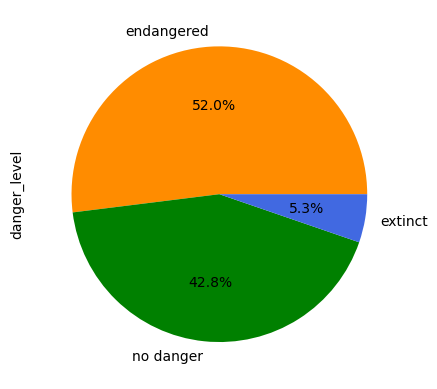

In [49]:

my_labels=['endangered','no danger','extinct']
my_colors=['darkorange','green','royalblue']
df['danger_level'].value_counts().plot(kind='pie',labels=my_labels,autopct='%1.1f%%',colors=my_colors)

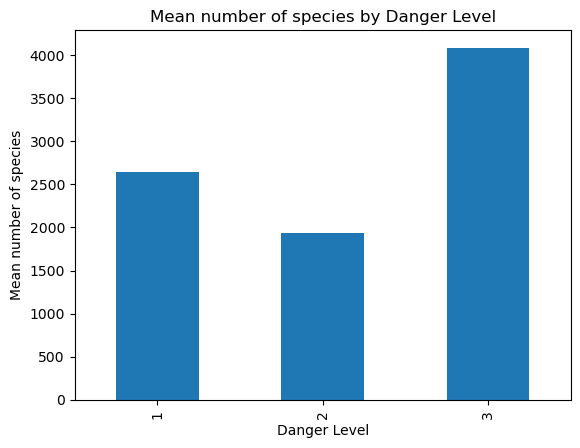

In [50]:
mean_pop = df.groupby('danger_level')['number_of_species'].mean()

mean_pop.plot(kind='bar')
plt.title('Mean number of species by Danger Level')
plt.xlabel('Danger Level')
plt.ylabel('Mean number of species')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x1507ef71f40>,
 [Text(0, 0, 'extinct'), Text(1, 0, 'endangered'), Text(2, 0, 'no danger')])

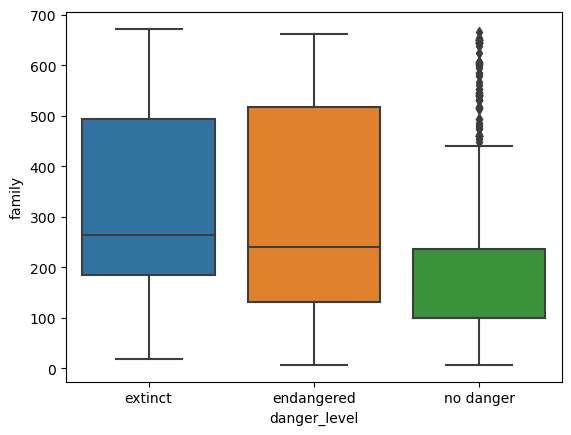

In [51]:
my_colors=['royalblue','darkorange','green']
sns.boxplot(df.danger_level,df.family)
plt.xticks([0, 1, 2], ['extinct', 'endangered', 'no danger'])

<AxesSubplot:>

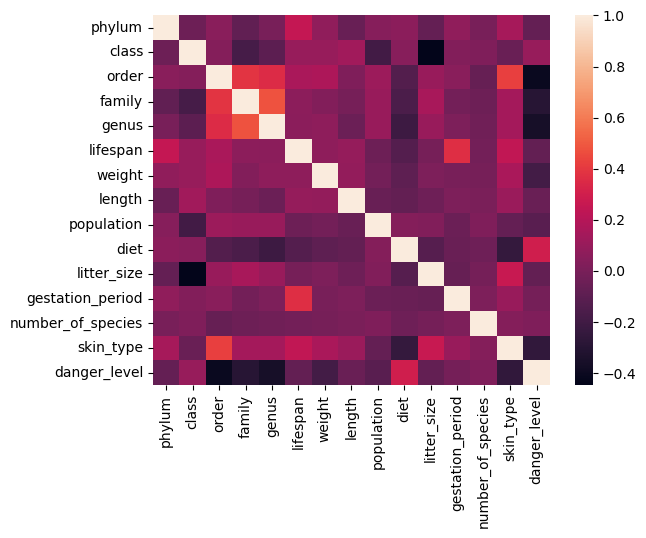

In [56]:
sns.heatmap(df.corr())

<font size="5">__step 6: machine larning__</font>

<font size="4">*with knn we succeeded to predict the danger level with score of 0.77 accuracy </font>

In [53]:
X = df[['phylum', 'class','order', 'family', 'genus', 'lifespan','length','weight','population','diet', 'litter_size', 'gestation_period', 'number_of_species', 'skin_type'  ]]
y = df['danger_level']


max_score = 0;

for k in range(2,22):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    if (score > max_score):
        max_score = score;
        best_k = k;

best_k


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

14

In [54]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the knn model to the training data
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)

# predictions
y_pred = knn.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
#

Accuracy: 0.77


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
from sklearn.naive_bayes import GaussianNB
# Trying also with the gaussian navive bayes algorithm
clf = GaussianNB()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

#calculate accouracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.6412698412698413


<font size="5">__to summarize:__</font>

<font size="4">*with the data that we had and the target category of danger level we found that we can predict the animal level of danger. we sure that if there could be a big data that can provide accurate and relevant information about each animal we could find connection between the divine of every category. </font>